## RNG examples

> RNG is an acronym for random number generator. 
>
> Strictly speaking, numpy uses pseudo-random numbers and thus is not to be used in scenarios where true randomness is mission critical (e.g. in cryptography)

These code blocks are for demonstrating examples for RNG similar to those presented to you in the R worksheet for the pyhtonistas among you.

Base python actually also has the capacity to generate random numbers: https://docs.python.org/3/library/random.html 

However for tie-in with the rest of the course and compatability with other libraries it is most convenient to use NumPy's capabilities. If exactly what you want is not described here, before trying to roll your own look up what you wish to do in the NumPy/SciPy documentation (between them they have almost every distribution under the sun) or Google.

## Generation

(array([501., 495., 523., 514., 498., 497., 458., 505., 504., 505.]),
 array([1.66685451e-04, 1.00142082e-01, 2.00117479e-01, 3.00092876e-01,
        4.00068272e-01, 5.00043669e-01, 6.00019066e-01, 6.99994463e-01,
        7.99969859e-01, 8.99945256e-01, 9.99920653e-01]),
 <BarContainer object of 10 artists>)

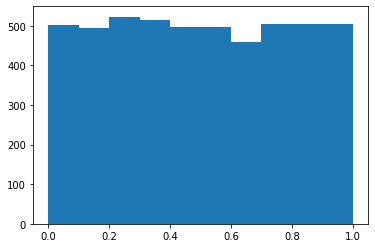

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1D array of 5000 numbers from an uniform distribution
u = np.random.uniform(size=(5000,))
plt.hist(u)

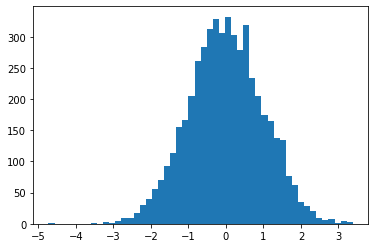

In [5]:
# Generate 5000 numbers from a gaussian distribuition with mean 0 and sd 1
x = np.random.normal(loc=0, scale=1, size=(5000,1)) 
plt.hist(x, bins=50)
# Pass here just to suppress annoying matplotlib jupyter junk
pass 

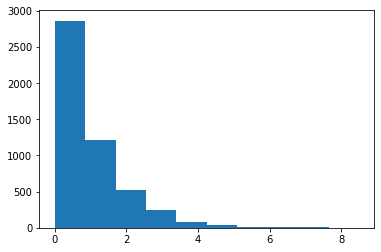

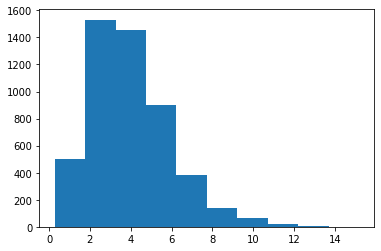

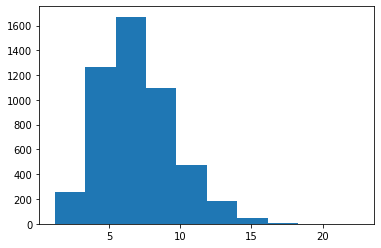

In [8]:
# Let's generate  5000 numbers from three  gamma distributions and examine their skewness 
y1 = np.random.gamma(size=(5000), shape = 1, scale=1)
y2 = np.random.gamma(size=(5000), shape = 4, scale=1)
y3 = np.random.gamma(size=(5000), shape = 7, scale=1)

plt.hist(y1)
plt.figure()
plt.hist(y2)
plt.figure()
plt.hist(y3)
pass

## Sampling

In [12]:
# Create a vector with a sequence of 1 to 10
s = np.arange(1,11) 
s

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
# Create a sample (without replacement, **NOT the default**) of 5 elements 
s1 = np.random.choice(s,size=(5,), replace=False)
s1

array([ 1,  7, 10,  5,  3])

In [14]:
# Create a sample with 15 elements, note that the sample size is bigger than 
# the length of the original vector, so we need to allow replacement 
s2 = np.random.choice(s,size=(15,))
s2

array([ 7,  1,  4,  8,  9,  2,  9,  4,  8,  5,  4,  9,  6,  8, 10])

In [20]:
# To  produce the same random number, fix the seed
# Style note: the following verbose way of writing imports
# is a common way of playing nicely with `git` in an industry setting
from numpy.random import MT19937
from numpy.random import RandomState
from numpy.random import SeedSequence

rs = RandomState(MT19937(SeedSequence(129)))
# NOTE: unlike R the seed is not global state - you need to use it
# in your calls to the RNG
s1 = rs.choice(s,size=(5,), replace=False)
print(s1)
rs = RandomState(MT19937(SeedSequence(129)))
s1 = rs.choice(s,size=(5,), replace=False)
print(s1) 

[ 9  5 10  7  2]
[ 9  5 10  7  2]


In [23]:
rs = RandomState(MT19937(SeedSequence(129)))
# NOTE: unlike R the seed is not global state - you need to use it
# in your calls to the RNG
s1 = rs.choice(s,size=(5,))
print(s1)
rs = RandomState(MT19937(SeedSequence(129)))
s1 = rs.choice(s,size=(5,))
print(s1) 

[ 3 10  4  8  1]
[ 3 10  4  8  1]


In [35]:
# Generate 5000 observations from a bivariate normal 
sigma = np.array([[.5, .2] ,[.2, .1]])
mu = np.array([.2, .6])
X = np.random.multivariate_normal(mu, sigma, size=(5000,))
X

array([[-0.08267051,  0.54656688],
       [ 1.28949141,  0.84065554],
       [-1.46525487,  0.01945227],
       ...,
       [ 1.3106081 ,  1.02008268],
       [ 0.25333653,  0.71737589],
       [ 0.76454107,  0.91244481]])

[0.198182   0.60018946]
[0.50096306 0.10016724]


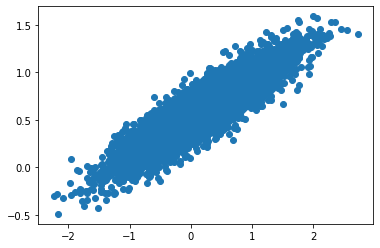

In [36]:
plt.scatter(X[:,0], X[:,1])
# Calculating means by column, e.g. by dimension
X.mean(axis=0)
# Calculating means by column, e.g. by dimension
print(X.mean(axis=0))
# Likewise, the variance
print(X.var(axis=0))

[1.23640165 1.22381357]
[9.19683166 8.91221603]


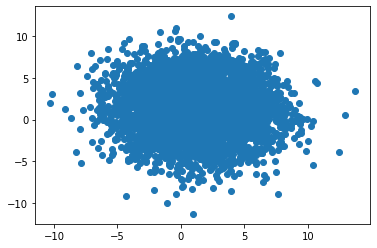

In [37]:
# Strictly speaking you can generate **independent** multivariate
# vectors of any distribution by supplying the shape you would like to the generator
X = np.random.normal(loc=1.2, scale=3, size=(5000,2))
plt.scatter(X[:,0], X[:,1])
# Calculating means by column, e.g. by dimension
print(X.mean(axis=0))
# Likewise, the variance
print(X.var(axis=0))

In [48]:
# As we are evaluating a PDF we want to get probability densities
# Alas, NumPy does not come with such functions so we need to import
# from another package for common stats functions, SciPy

# Alternatively, as the PDF is relatively simple for a normal distribution
# one could implement it using numpy operations.
from scipy.stats import multivariate_normal
# For the surface plot
from matplotlib import cm

u = np.linspace(-5, 5, 1000)
v = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(u,v)

# Here we supply `-1` as axis to say when we stack we want to nest into the last dimension
grid = np.stack([X, Y], axis=-1)
grid.shape

(1000, 1000, 2)

<IPython.core.display.Javascript object>


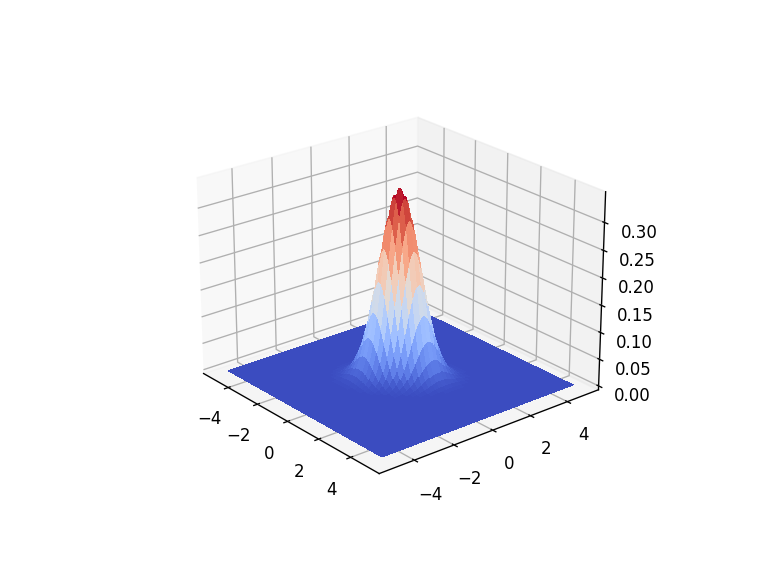

In [51]:
sigma = np.array([[.5, .2], [.2, .5]])
distribution = multivariate_normal(cov=sigma)

Z = distribution.pdf(grid)

# Magic command to make it interactive
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, linewidth=0, cmap=cm.coolwarm, antialiased=False)